In [59]:
# The number of entries to read in. Use it to have fast turn-around
max_events=None
# Number on CV folds
n_cv=5

import os
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling

pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 100)

import gc

import keggler as kg
from utils_ig import *

from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, accuracy_score, mean_squared_error, confusion_matrix

PATH = '/home/mlisovyi/.kaggle/competitions/instant-gratification/'

print(os.listdir(PATH))

['sample_submission.csv.zip', 'train.csv.zip', 'test.csv.zip']


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df_trn = pd.read_csv(PATH+'train.csv.zip')
df_tst = pd.read_csv(PATH+'test.csv.zip')

In [4]:
df_trn.head()

id  muggy-smalt-axolotl-pembus  \
0  707b395ecdcbb4dc2eabea00e4d1b179                   -2.070654   
1  5880c03c6582a7b42248668e56b4bdec                   -0.491702   
2  4ccbcb3d13e5072ff1d9c61afe2c4f77                   -1.680473   
3  e350f17a357f12a1941f0837afb7eb8d                    0.183774   
4  a8f910ea6075b6376af079055965ff68                   -0.203933   

   dorky-peach-sheepdog-ordinal  slimy-seashell-cassowary-goose  \
0                      1.018160                        0.228643   
1                      0.082645                       -0.011193   
2                      0.860529                       -1.076195   
3                      0.919134                       -0.946958   
4                     -0.177252                        0.368074   

   snazzy-harlequin-chicken-distraction  frumpy-smalt-mau-ordinal  \
0                              0.857221                  0.052271   
1                              1.071266                 -0.346347   
2                              0.740124                  3.678445   
3                              0.918492                  0.862278   
4                             -0.701320                 -1.104391   

   stealthy-beige-pinscher-golden  chummy-cream-tarantula-entropy  \
0                        0.230303                       -6.385090   
1                       -0.082209                        0.110579   
2                        0.288558                        0.515875   
3                        1.155287                        0.911106   
4                        0.735760                        0.894273   

   hazy-emerald-cuttlefish-unsorted  nerdy-indigo-wolfhound-sorted  \
0                          0.439369                      -0.721946   
1                         -0.382374                      -0.229620   
2                          0.920590                      -1.223277   
3                          0.562598                      -1.349685   
4                         -1.375826                      -5.144946   

   leaky-amaranth-lizard-sorted  ugly-tangerine-chihuahua-important  \
0                     -0.227027                            0.575964   
1                      0.783980                           -1.280579   
2                     -1.029780                           -2.203397   
3                     -1.182729                            0.003159   
4                     -2.048711                            0.629773   

   shaggy-silver-indri-fimbus  flaky-chocolate-beetle-grandmaster  \
0                    1.541908                            1.745286   
1                   -1.003480                           -7.753201   
2                   -7.088717                            0.438218   
3                   -0.626847                            0.368980   
4                   -4.252669                           -0.087420   

   squirrely-harlequin-sheep-sumble  freaky-tan-angelfish-noise  \
0                         -0.624271                    3.600958   
1                         -1.320547                    0.919078   
2                         -0.848173                    1.542666   
3                          1.560784                    0.502851   
4                         -0.794367                   -1.063963   

   lousy-plum-penguin-sumble  bluesy-rose-wallaby-discard  \
0                   1.176489                    -0.182776   
1                  -1.036068                     0.030213   
2                  -2.166858                    -0.867670   
3                  -0.108050                     0.633208   
4                   0.115997                     0.895180   

   baggy-copper-oriole-dummy  stealthy-scarlet-hound-fepid  \
0                  -0.228391                      1.682263   
1                   0.910172                     -0.905345   
2                  -0.980947                      0.567793   
3                  -0.411502                     -3.201592   
4                   3.184848                      2.05

In [5]:
df_tst.head()

id  muggy-smalt-axolotl-pembus  \
0  1c13f2701648e0b0d46d8a2a5a131a53                   -5.490030   
1  ba88c155ba898fc8b5099893036ef205                    0.571698   
2  7cbab5cea99169139e7e6d8ff74ebb77                    0.478202   
3  ca820ad57809f62eb7b4d13f5d4371a0                    0.124178   
4  7baaf361537fbd8a1aaa2c97a6d4ccc7                   -1.806586   

   dorky-peach-sheepdog-ordinal  slimy-seashell-cassowary-goose  \
0                      0.593976                        1.532732   
1                      0.495494                        1.133975   
2                     -1.429985                        0.410429   
3                     -0.347069                       -0.457690   
4                      0.660947                       -0.004663   

   snazzy-harlequin-chicken-distraction  frumpy-smalt-mau-ordinal  \
0                             -0.361234                 -0.155282   
1                             -0.315875                 -2.142458   
2                             -1.329215                 -0.888456   
3                              1.248395                  0.368441   
4                             -3.383956                  1.018235   

   stealthy-beige-pinscher-golden  chummy-cream-tarantula-entropy  \
0                       -1.340582                        1.626819   
1                       -0.478650                       -1.458941   
2                        0.721798                       -0.809630   
3                        0.832838                       -2.050084   
4                        1.670834                       -0.208904   

   hazy-emerald-cuttlefish-unsorted  nerdy-indigo-wolfhound-sorted  \
0                          4.280084                      -0.340155   
1                          0.977352                       0.159189   
2                         -0.216637                       4.038961   
3                          3.168626                      -0.399716   
4                          0.124925                       0.224575   

   leaky-amaranth-lizard-sorted  ugly-tangerine-chihuahua-important  \
0                     -0.653070                            2.817394   
1                      0.425304                            1.366214   
2                      1.605018                            0.904172   
3                      0.063732                           -0.469298   
4                      2.111725                            0.168708   

   shaggy-silver-indri-fimbus  flaky-chocolate-beetle-grandmaster  \
0                    1.211543                           -0.819354   
1                   -1.097810                           -0.128929   
2                    0.087588                           -0.357494   
3                   -0.036313                           -0.410907   
4                   -0.919217                            0.025722   

   squirrely-harlequin-sheep-sumble  freaky-tan-angelfish-noise  \
0                         -0.019935                    0.634466   
1                         -0.563375                   -0.389307   
2                         -0.009733                   -0.972136   
3                          0.628839                   -1.735393   
4                         -0.982574                   -1.721172   

   lousy-plum-penguin-sumble  bluesy-rose-wallaby-discard  \
0                  -1.604789                     0.756771   
1                  -0.167991                     0.314843   
2                   0.554583                    -1.034569   
3                   0.086511                     0.706585   
4                  -0.285439                    -0.532431   

   baggy-copper-oriole-dummy  stealthy-scarlet-hound-fepid  \
0                   0.451960                      0.309252   
1                   0.530220                     -0.512497   
2                   1.599066                     -4.408794   
3                  -1.208220                      0.501175   
4                  -0.383761                     -0.57

In [6]:
print('Shapes of train and test = {} and {}'.format(df_trn.shape, df_tst.shape))

Shapes of train and test = (262144, 258) and (131073, 257)


In [7]:
_ = kg.reduce_mem_usage(df_tst, force_obj_in_category=False)
_ = kg.reduce_mem_usage(df_trn, force_obj_in_category=False)

Memory usage of dataframe is 267.13 MB
Memory usage after optimization is: 75.13 MB
Decreased by 71.9%
Memory usage of dataframe is 536.25 MB
Memory usage after optimization is: 150.50 MB
Decreased by 71.9%


In [8]:
df_trn.iloc[:10000,:].describe()

muggy-smalt-axolotl-pembus  dorky-peach-sheepdog-ordinal  \
count                10000.000000                  10000.000000   
mean                     0.028305                      0.037201   
std                      1.765625                      1.750977   
min                    -12.890625                    -15.640625   
25%                     -0.755981                     -0.766724   
50%                      0.031860                      0.024139   
75%                      0.788086                      0.797363   
max                     11.546875                     14.671875   

       slimy-seashell-cassowary-goose  snazzy-harlequin-chicken-distraction  \
count                    10000.000000                          10000.000000   
mean                        -0.007668                             -0.002348   
std                          1.736328                              1.857422   
min                        -12.968750                            -12.890625   
25%                         -0.773193                             -0.799805   
50%                         -0.012215                              0.002710   
75%                          0.763184                              0.788574   
max                         16.140625                             11.835938   

       frumpy-smalt-mau-ordinal  stealthy-beige-pinscher-golden  \
count              10000.000000                    10000.000000   
mean                  -0.009842                       -0.005608   
std                    1.755859                        1.728516   
min                  -12.335938                      -11.960938   
25%                   -0.789185                       -0.763306   
50%                   -0.006319                        0.001956   
75%                    0.771729                        0.765137   
max                   16.812500                       11.835938   

       chummy-cream-tarantula-entropy  hazy-emerald-cuttlefish-unsorted  \
count                    10000.000000                      10000.000000   
mean                        -0.008499                          0.006397   
std                          1.767578                          1.661133   
min                        -13.757812                        -12.359375   
25%                         -0.780273                         -0.750610   
50%                          0.014400                          0.000456   
75%                          0.790649                          0.749146   
max                         12.109375                         13.093750   

       nerdy-indigo-wolfhound-sorted  leaky-amaranth-lizard-sorted  \
count                   10000.000000                  10000.000000   
mean                        0.007061                      0.024399   
std                         1.902344                      1.601562   
min                       -13.796875                    -10.328125   
25%                        -0.804321                     -0.728516   
50%                         0.010895                      0.010521   
75%                         0.785278                      0.760498   
max                        12.531250                     11.421875   

       ugly-tangerine-chihuahua-important  shaggy-silver-indri-fimbus  \
count                        10000.000000                10000.000000   
mean                            -0.007206                    0.008461   
std                              1.682617                    1.621094   
min                            -13.109375                  -11.625000   
25%                             -0.753540                   -0.754028   
50%                              0.003222                    0.001112   
75%                              0.723145                    0.769653   
max                             10.890625                   10.671875   

       flaky-chocolate-beetle-grandmaster  squirrely-harlequin-sheep-sumble  \
count                        10000.000000  

In [9]:
df_tst.iloc[:10000,:].describe()

muggy-smalt-axolotl-pembus  dorky-peach-sheepdog-ordinal  \
count                10000.000000                  10000.000000   
mean                     0.017334                     -0.025055   
std                      1.680664                      1.692383   
min                    -10.812500                    -10.765625   
25%                     -0.769043                     -0.785767   
50%                      0.023827                      0.005545   
75%                      0.778320                      0.752075   
max                     11.000000                     13.609375   

       slimy-seashell-cassowary-goose  snazzy-harlequin-chicken-distraction  \
count                    10000.000000                          10000.000000   
mean                        -0.010872                              0.014999   
std                          1.721680                              1.887695   
min                        -11.234375                            -13.726562   
25%                         -0.801270                             -0.801025   
50%                         -0.016129                              0.007801   
75%                          0.762207                              0.812988   
max                         12.875000                             11.273438   

       frumpy-smalt-mau-ordinal  stealthy-beige-pinscher-golden  \
count              10000.000000                    10000.000000   
mean                  -0.029129                        0.008591   
std                    1.767578                        1.738281   
min                  -13.132812                      -11.296875   
25%                   -0.811157                       -0.766846   
50%                   -0.016327                        0.008286   
75%                    0.755493                        0.788696   
max                   15.335938                       13.476562   

       chummy-cream-tarantula-entropy  hazy-emerald-cuttlefish-unsorted  \
count                    10000.000000                      10000.000000   
mean                        -0.004135                          0.001464   
std                          1.717773                          1.728516   
min                        -13.968750                        -12.304688   
25%                         -0.792114                         -0.761230   
50%                         -0.015984                         -0.004066   
75%                          0.758423                          0.769653   
max                         11.804688                         12.968750   

       nerdy-indigo-wolfhound-sorted  leaky-amaranth-lizard-sorted  \
count                   10000.000000                  10000.000000   
mean                        0.043335                      0.022568   
std                         1.879883                      1.661133   
min                       -12.281250                    -12.210938   
25%                        -0.768677                     -0.734985   
50%                         0.005062                      0.012058   
75%                         0.820312                      0.760864   
max                        14.132812                     12.437500   

       ugly-tangerine-chihuahua-important  shaggy-silver-indri-fimbus  \
count                        10000.000000                10000.000000   
mean                             0.015732                    0.012489   
std                              1.676758                    1.628906   
min                            -11.070312                  -11.054688   
25%                             -0.737793                   -0.739014   
50%                              0.020432                   -0.001103   
75%                              0.783813                    0.760254   
max                             12.585938                   12.531250   

       flaky-chocolate-beetle-grandmaster  squirrely-harlequin-sheep-sumble  \
count                        10000.000000  

In [10]:
base_cols = [c for c in df_tst.columns if c not in ['id']]

In [11]:
col_magic = 'wheezy-copper-turtle-magic'

## General EDA

### General report

In [12]:
# report = pandas_profiling.ProfileReport(df_trn.iloc[:10000,1:100], bins=50, check_correlation=True, correlation_threshold=0.9)
report = pandas_profiling.ProfileReport(df_trn.iloc[:][[col_magic]], bins=128, check_correlation=True, correlation_threshold=0.9)

In [13]:
report

### Report for a single magic slice

In [96]:
tmp = df_trn[df_trn[col_magic] == 0]

In [17]:
report = pandas_profiling.ProfileReport(tmp[base_cols], bins=128, check_correlation=True, correlation_threshold=0.9)

In [18]:
report

## PCA

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.5).fit(tmp[base_cols])
df_trn_pca = pd.DataFrame(pca.transform(tmp[base_cols]), columns=['PCA_{}'.format(i) for i in range(pca.n_components_)])

In [109]:
df_trn_pca['target'] = tmp['target'].values

## Correlations with the targets

In [112]:
df_trn_corr = df_trn.iloc[:10000,:].corr()

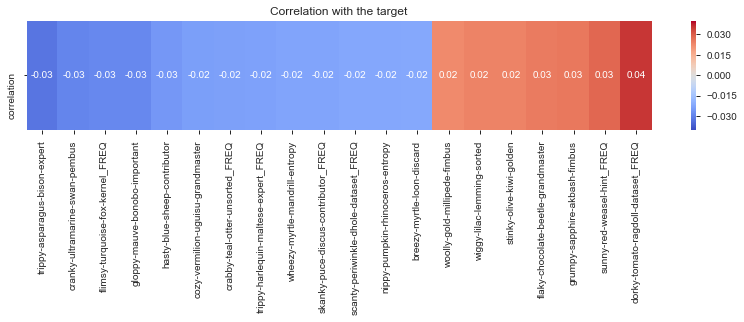

In [113]:
kg.plot_top_corr_with_target(df_trn_corr, n=20, v=0.04, col_target='target')

## Duplicate values

In [64]:
_= add_total_value_counts(df_trn, df_trntst, cols=[v for v in base_cols if v != col_magic])

In [65]:
df_trn.head()

id  muggy-smalt-axolotl-pembus  \
0  707b395ecdcbb4dc2eabea00e4d1b179                   -2.070312   
1  5880c03c6582a7b42248668e56b4bdec                   -0.491699   
2  4ccbcb3d13e5072ff1d9c61afe2c4f77                   -1.680664   
3  e350f17a357f12a1941f0837afb7eb8d                    0.183716   
4  a8f910ea6075b6376af079055965ff68                   -0.203979   

   dorky-peach-sheepdog-ordinal  slimy-seashell-cassowary-goose  \
0                      1.018555                        0.228638   
1                      0.082642                       -0.011192   
2                      0.860352                       -1.076172   
3                      0.918945                       -0.946777   
4                     -0.177246                        0.368164   

   snazzy-harlequin-chicken-distraction  frumpy-smalt-mau-ordinal  \
0                              0.857422                  0.052277   
1                              1.071289                 -0.346436   
2                              0.740234                  3.677734   
3                              0.918457                  0.862305   
4                             -0.701172                 -1.104492   

   stealthy-beige-pinscher-golden  chummy-cream-tarantula-entropy  \
0                        0.230347                       -6.386719   
1                       -0.082214                        0.110596   
2                        0.288574                        0.516113   
3                        1.155273                        0.911133   
4                        0.735840                        0.894043   

   hazy-emerald-cuttlefish-unsorted  nerdy-indigo-wolfhound-sorted  \
0                          0.439453                      -0.722168   
1                         -0.382324                      -0.229614   
2                          0.920410                      -1.223633   
3                          0.562500                      -1.349609   
4                         -1.375977                      -5.144531   

   leaky-amaranth-lizard-sorted  ugly-tangerine-chihuahua-important  \
0                     -0.227051                            0.576172   
1                      0.784180                           -1.280273   
2                     -1.029297                           -2.203125   
3                     -1.182617                            0.003159   
4                     -2.048828                            0.629883   

   shaggy-silver-indri-fimbus  flaky-chocolate-beetle-grandmaster  \
0                    1.541992                            1.745117   
1                   -1.003906                           -7.753906   
2                   -7.089844                            0.438232   
3                   -0.626953                            0.368896   
4                   -4.253906                           -0.087402   

   squirrely-harlequin-sheep-sumble  freaky-tan-angelfish-noise  \
0                         -0.624512                    3.601562   
1                         -1.320312                    0.918945   
2                         -0.848145                    1.542969   
3                          1.560547                    0.502930   
4                         -0.794434                   -1.063477   

   lousy-plum-penguin-sumble  bluesy-rose-wallaby-discard  \
0                   1.176758                    -0.182739   
1                  -1.036133                     0.030212   
2                  -2.166016                    -0.867676   
3                  -0.108032                     0.633301   
4                   0.115967                     0.895020   

   baggy-copper-oriole-dummy  stealthy-scarlet-hound-fepid  \
0                  -0.228394                      1.682617   
1                   0.910156                     -0.905273   
2                  -0.980957                      0.567871   
3                  -0.411621                     -3.201172   
4                   3.185547                      2.05

In [69]:
cols_freq = [c for c in df_trn if c.endswith('_FREQ')]
# cols_freq

In [26]:
pandas_profiling.ProfileReport(df_trn.iloc[:,5:7], bins=50, check_correlation=True, correlation_threshold=0.9)